# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df = pd.read_csv('D:\Laskar AI Project\Build Machine Learning System\Submission\water_potability_raw.csv')

In [8]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
# Menampilkan statistika deskriptif unuk setiap kolom
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [11]:
# Menjumlah total missing value pada dataset
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
# Cek baris duplikat dalam df
duplicates = df.duplicated()

# Hitung jumlah baris duplikat
duplicate_count = duplicates.sum()

# Cetak jumlah baris duplikat
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


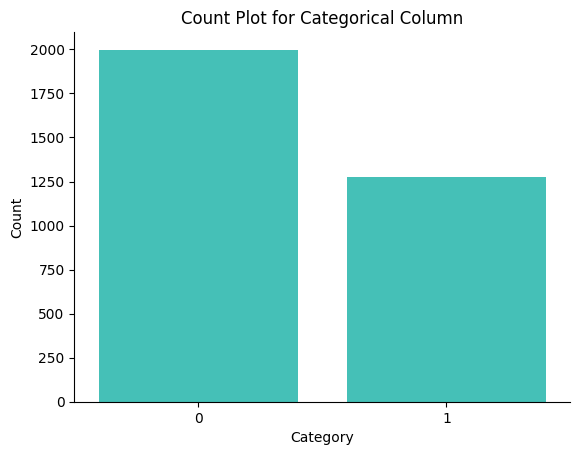

In [16]:
# Membuat count plot
sns.countplot(x='Potability', data=df, color='#30D5C8')
sns.despine()
plt.title('Count Plot for Categorical Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Berdasarkan *count_plot* diatas, didapatkan informasi bahwa:
- kelas `0` pada label `Potability` memiliki nyaris 2000 data.
- kelas `1` pada label `Potability` hanya memiliki sekitar 1250 data.

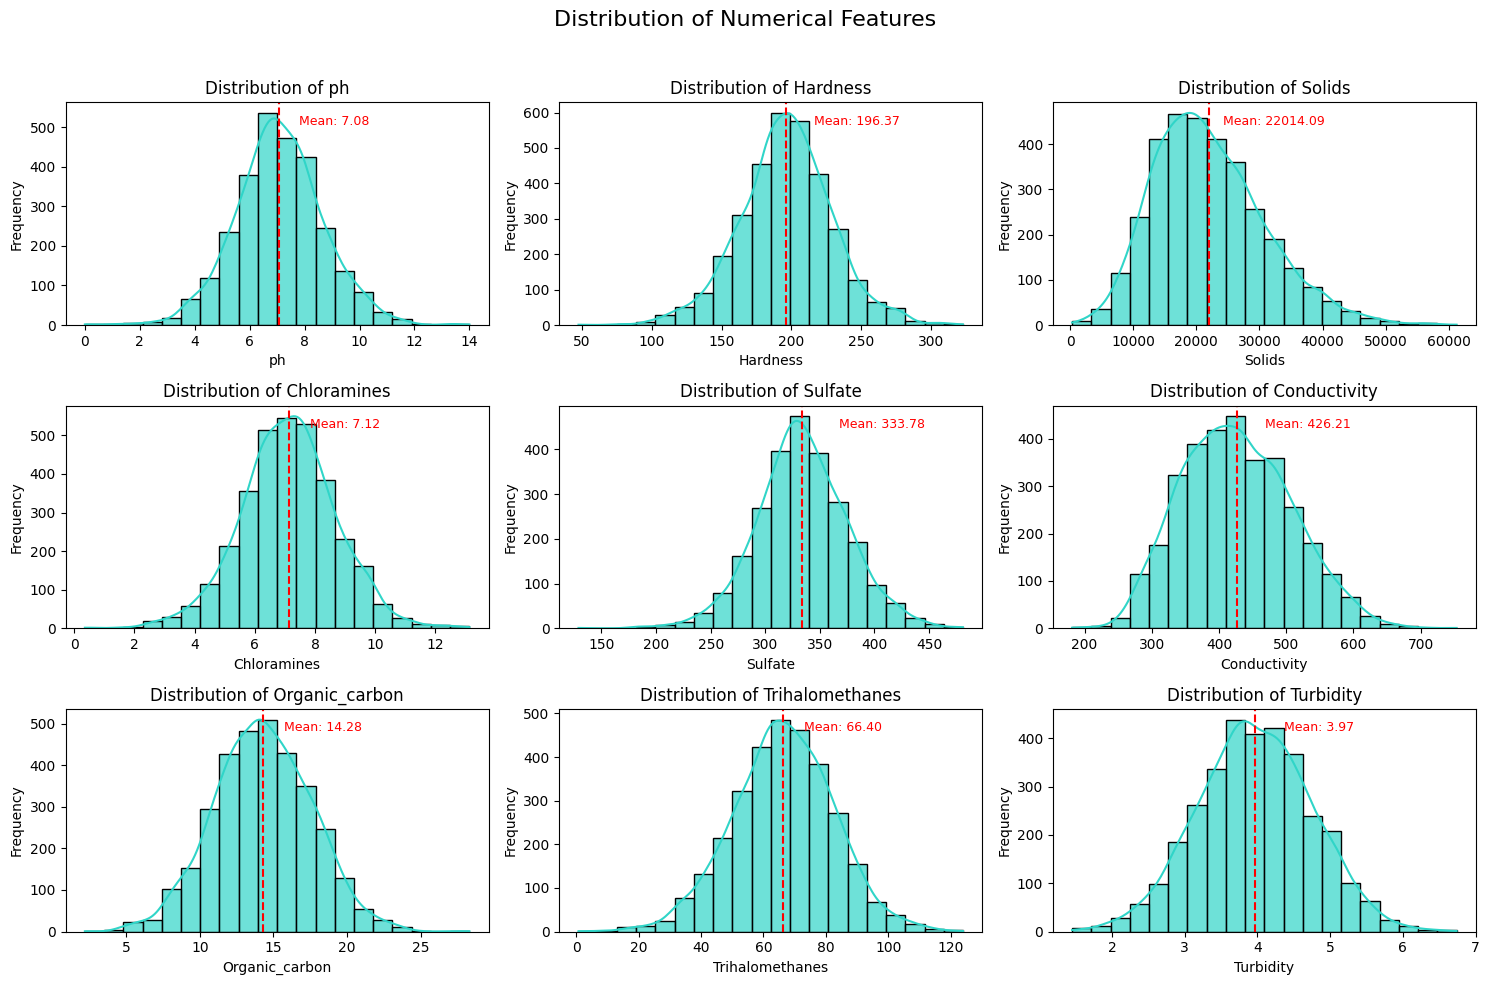

In [17]:
# Create a more refined visualization for numerical features
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms for each numerical column
for i, column in enumerate(numerical_columns[:9]):  # Only take up to 9 columns to fit the grid
    sns.histplot(df[column], bins=20, kde=True, color='#30D5C8', ax=axs[i], alpha=0.7)
    axs[i].set_title(f'Distribution of {column}', fontsize=12)
    axs[i].set_xlabel(column, fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)

    # Add mean line
    mean_val = df[column].mean()
    axs[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
    axs[i].text(mean_val*1.1, axs[i].get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}',
                color='red', fontsize=9)

# Remove unused subplots if any
for i in range(len(numerical_columns[:9]), len(axs)):
    fig.delaxes(axs[i])

plt.suptitle('Distribution of Numerical Features', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Berdasarkan visualisasi diatas, gambar ini menampilkan setiap kolom numerik yang ada pada dataset, seperti ```pH```, ```Hardness```, ```Solids```, ```Chrolamines```, ```Sulfate```, ```Conductivity```, ```Organic_carbon```, ```Trihalomethanes```, ```Turbidity```. Dari semua kolom yang ditampilkan, hanya kolom ```Solids``` dan ```Conductivity``` yang memiliki skewness ke arah kiri.

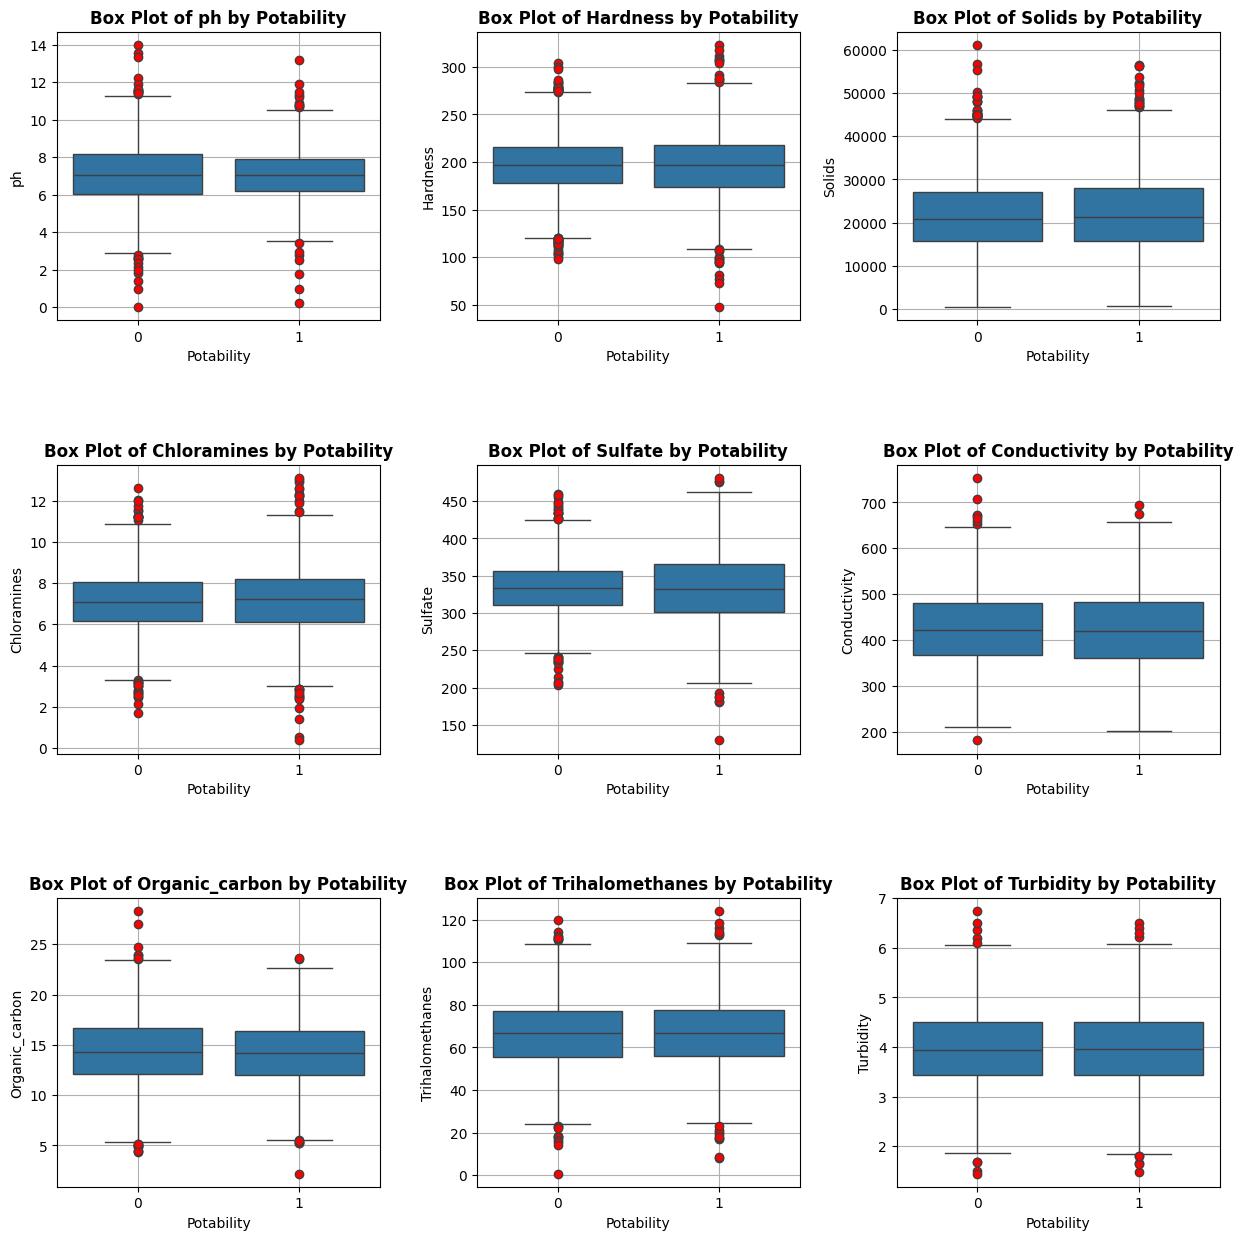

In [19]:
# Box Plots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(df.columns[:-1]): #potability column except
    row = i // 3
    col_idx = i % 3

    sns.boxplot(data=df, x='Potability', y=col, ax=ax[row, col_idx],
                flierprops=dict(markerfacecolor='red', marker='o'))
    ax[row, col_idx].set_title(f'Box Plot of {col} by Potability', fontweight='bold')
    ax[row, col_idx].grid(True)

plt.show()

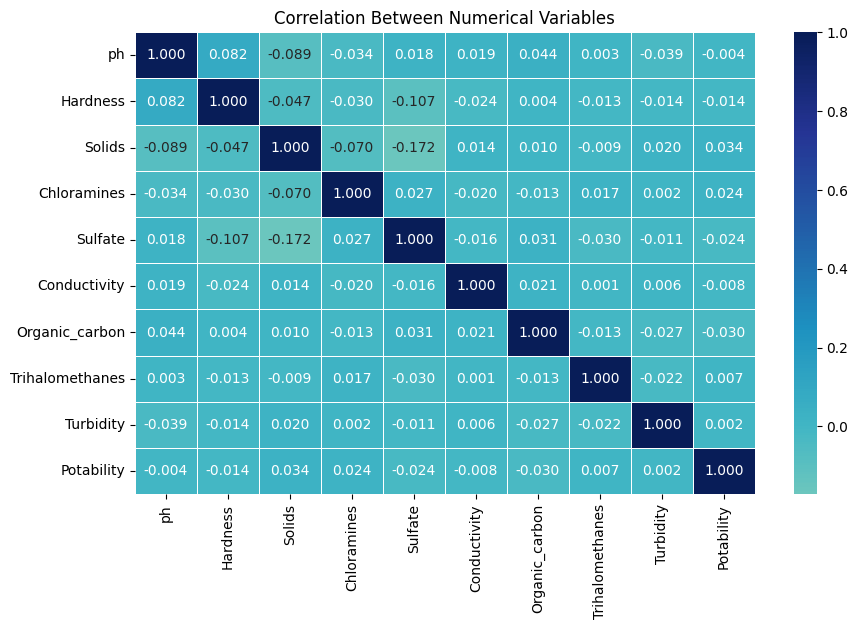

In [21]:
# Heatmap Correlation Between Numerical Variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', center=0, linewidths=0.5, linecolor='white', fmt='.3f')
plt.title('Correlation Between Numerical Variables')
plt.show()

Heatmap korelasi ini menampilkan koefisien korelasi Pearson antar variabel numerik, dengan warna biru tua menandakan korelasi positif yang lebih kuat dan warna terang menunjukkan korelasi lemah atau negatif. Secara keseluruhan, hubungan linier antar fitur tampak lemah, dengan korelasi terkuat yang teramati hanya -0.150 antara Sulfate dan Solids. Variabel target Potability juga menunjukkan korelasi yang sangat rendah dengan semua fitur lainnya, mengimplikasikan bahwa hubungan non-linier atau interaksi antar fitur kemungkinan lebih berperan dalam menentukan kelayakan minum air, sehingga mendukung penggunaan model yang lebih kompleks.

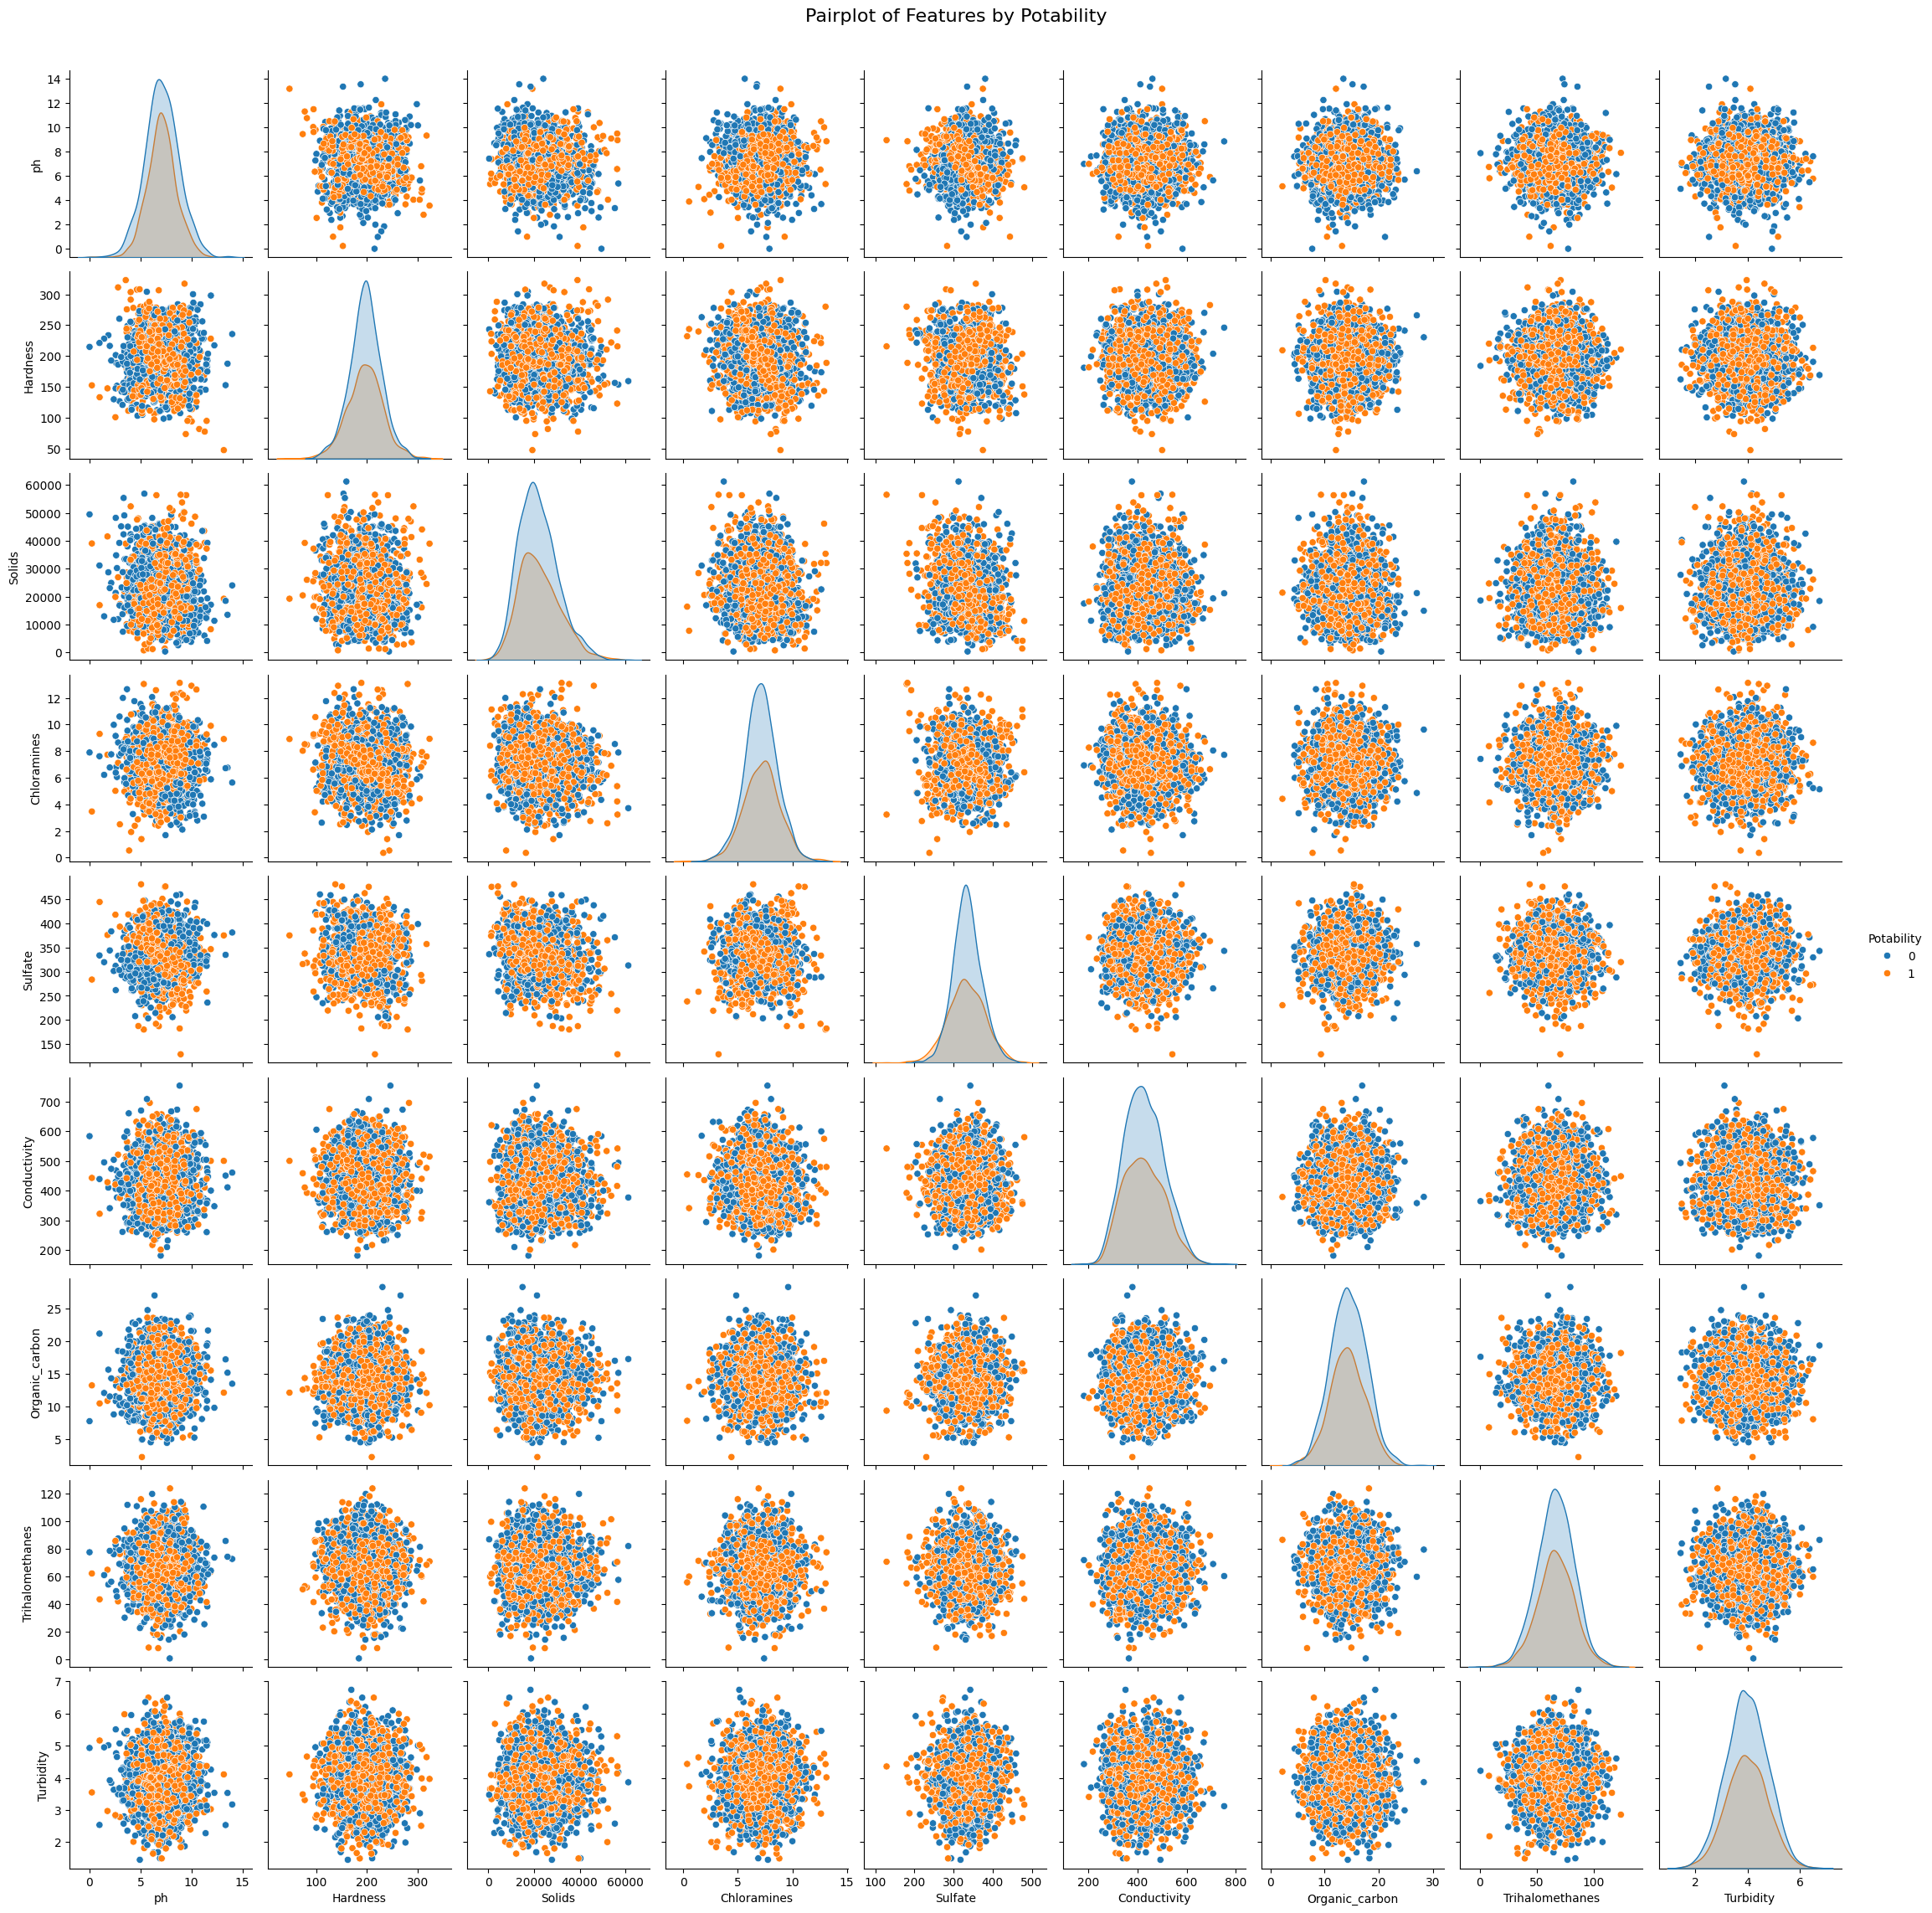

In [22]:
sns.pairplot(df, diag_kind='kde', hue='Potability', height=2.5)
plt.suptitle('Pairplot of Features by Potability', y=1.02, fontsize=16)
plt.show()

Berdasarkan hasil visualisasi di atas, tampak bahwa hampir semua variabel terdistribusi di sekitar nilai tengah dan tidak memperlihatkan pola atau karakteristik khusus terhadap variabel label, yaitu ```'Potability'```. Bahkan pada visualisasi tersebut meskipun data telah dipisahkan berdasarkan kategori ```0``` dan ```1``` (dengan warna biru dan oranye), tetap tidak ditemukan pola atau ciri khas tertentu pada masing-masing nilai label. Hal ini menunjukkan bahwa hubungan antar fitur, termasuk dengan variabel label, cenderung lemah atau berkorelasi rendah.


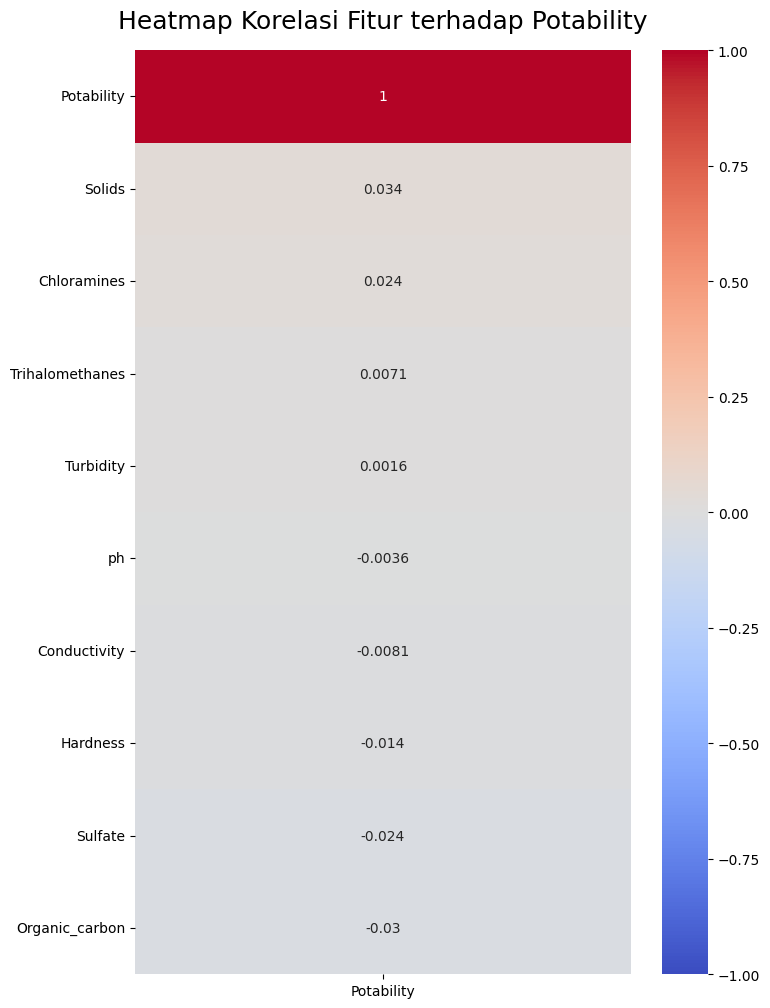

In [23]:
# Visualisasi korelasi antara fitur numerik dan label Potability

plt.figure(figsize=(8, 12))
corr_matrix = df.corr()[['Potability']].sort_values(by='Potability', ascending=False)
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
ax.set_title('Heatmap Korelasi Fitur terhadap Potability', fontsize=18, pad=16)
plt.show()for num_row in df.columns[:-1]:
    sns.histplot(data=df,x=num_row,hue='Potability', multiple="stack",palette="YlGnBu",)
    plt.title(f"{num_row} Histogram with Potability")
    plt.xlabel(f"{num_row}")
    plt.ylabel("frequency")
    plt.show()

Berdasarkan visualisasi diatas, terlihat bahwa kolom pH, Conductivity, Trihalomethanes, Turbidity memiliki skor korelasi yang paling kecil terhadap label. Kolom yang semacam ini baiknya di-drop saja untuk meringankan beban komputasi dan mengurangi dimensi dari dataset yang akan digunakan dalam pelatihan model

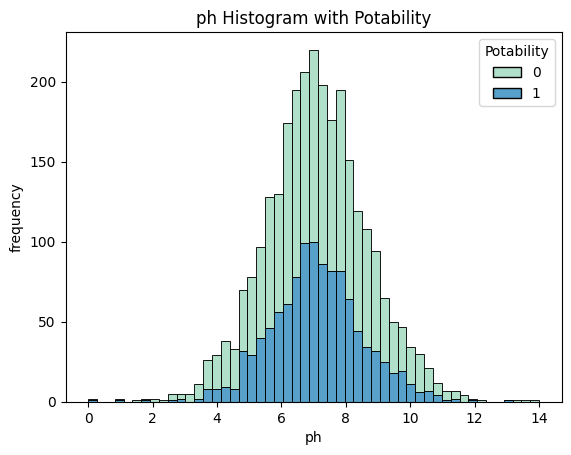

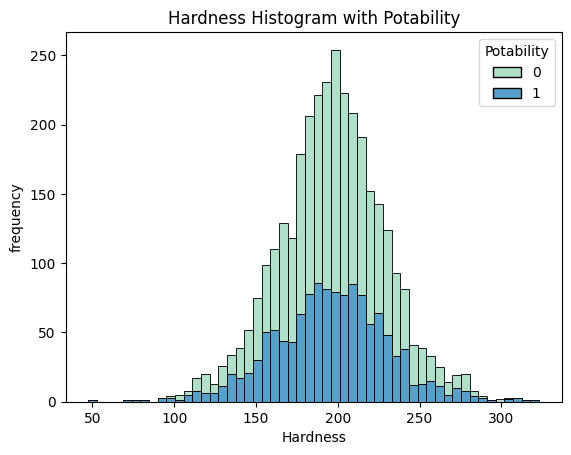

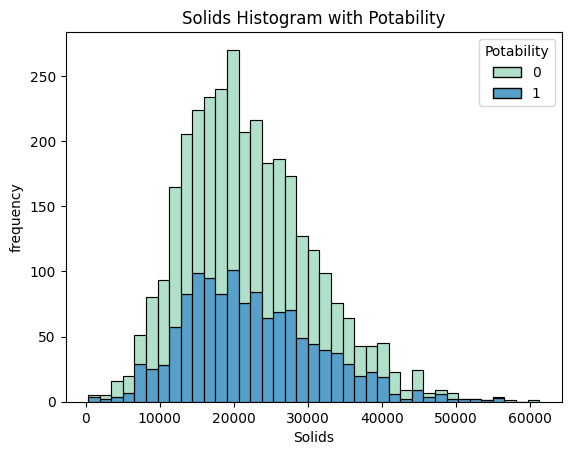

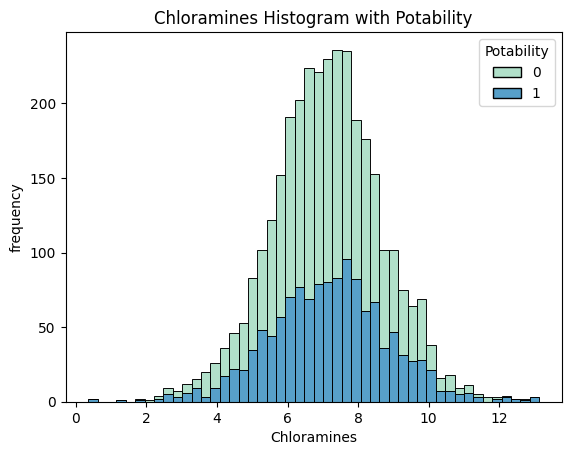

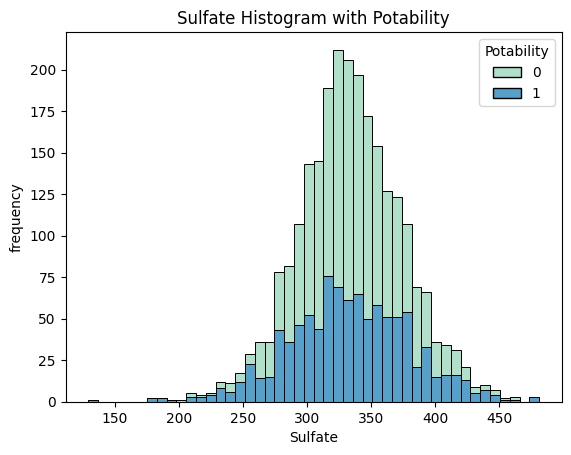

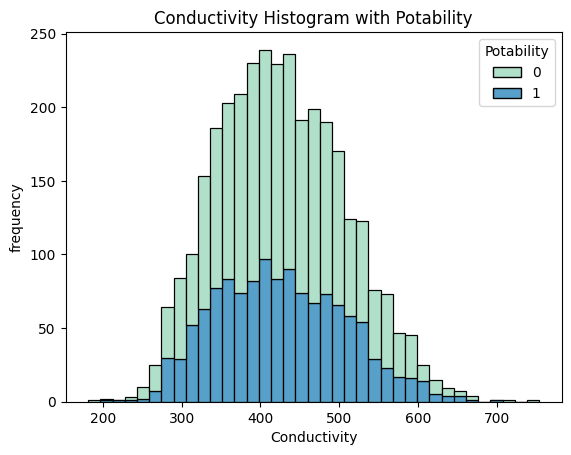

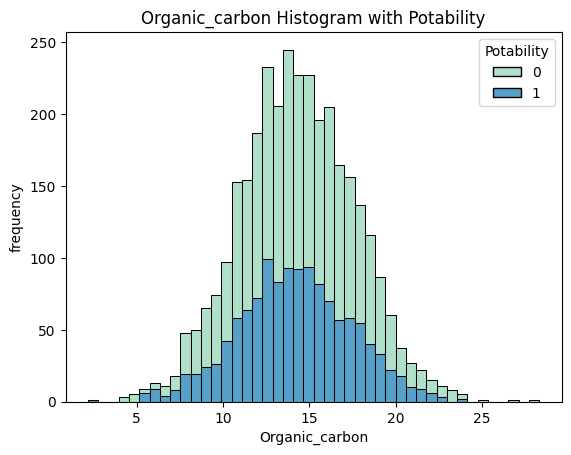

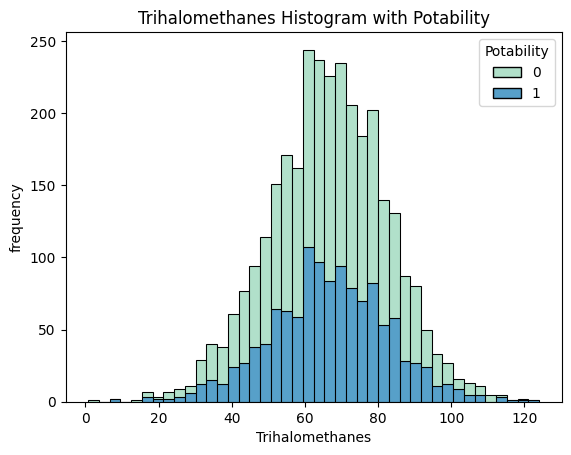

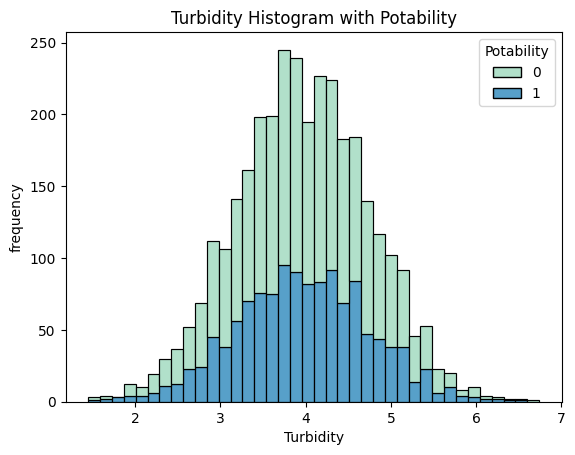

In [24]:
for num_row in df.columns[:-1]:
    sns.histplot(data=df,x=num_row,hue='Potability', multiple="stack",palette="YlGnBu",)
    plt.title(f"{num_row} Histogram with Potability")
    plt.xlabel(f"{num_row}")
    plt.ylabel("frequency")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [25]:
# Menangani Data Kosong (Missing Values)
df.fillna(df.median(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [26]:
# Memisahkan fitur dan target
x = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Melihat distribusi kelas awal
count_0 = np.sum(y == 0)
count_1 = np.sum(y == 1)
print("Sebelum oversampling:")
print(f"Jumlah baris data yang bernilai '0' ada sebanyak: {count_0}")
print(f"Jumlah baris data yang bernilai '1' ada sebanyak: {count_1}")
print(f"Persentase kelas 0: {count_0/(count_0+count_1)*100:.2f}%")
print(f"Persentase kelas 1: {count_1/(count_0+count_1)*100:.2f}%")

Sebelum oversampling:
Jumlah baris data yang bernilai '0' ada sebanyak: 1998
Jumlah baris data yang bernilai '1' ada sebanyak: 1278
Persentase kelas 0: 60.99%
Persentase kelas 1: 39.01%


In [27]:
# Over-sampling dengan keseimbangan penuh
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = over_sampler.fit_resample(x, y)

# Melihat distribusi kelas setelah oversampling
count_0 = np.sum(y_resampled == 0)
count_1 = np.sum(y_resampled == 1)
print("\nSetelah oversampling:")
print(f"Jumlah baris data yang bernilai '0' ada sebanyak: {count_0}")
print(f"Jumlah baris data yang bernilai '1' ada sebanyak: {count_1}")
print(f"Persentase kelas 0: {count_0/(count_0+count_1)*100:.2f}%")
print(f"Persentase kelas 1: {count_1/(count_0+count_1)*100:.2f}%")


Setelah oversampling:
Jumlah baris data yang bernilai '0' ada sebanyak: 1998
Jumlah baris data yang bernilai '1' ada sebanyak: 1998
Persentase kelas 0: 50.00%
Persentase kelas 1: 50.00%


In [28]:
# Scaling fitur setelah oversampling
scaler = MinMaxScaler((-1, 1))
x_resampled = scaler.fit_transform(x_resampled)

In [29]:
# Save Dataset after Preprocessing
df.to_csv('D:\Laskar AI Project\Build Machine Learning System\Submission\water_potability_preprocessed.csv', index=False)